In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import tiktoken

In [7]:
df = pd.read_parquet("hf://datasets/data-is-better-together/10k_prompts_ranked/data/train-00000-of-00001.parquet")

In [8]:
df.head()

,prompt,quality,metadata,avg_rating,num_responses,agreement_ratio,raw_responses,kind,cluster_description,topic
0,Provide step-by-step instructions on how to ma...,[{'user_id': 'd23b12c2-b601-490e-b5b3-2040eb39...,"{""source"": ""ultrachat"", ""kind"": ""synthetic"", ""...",5.000000,2,1.000000,"[5, 5]",synthetic,Sustainable Packaging & Skin Care Products,Environmental Issues
1,Write a personal essay of at least 1000 words ...,[{'user_id': '6621c3f0-1af2-4d75-acda-ed9c78b9...,"{""source"": ""ultrachat"", ""kind"": ""synthetic"", ""...",2.750000,4,0.687500,"[2, 3, 3, 3]",synthetic,Educational Technology & Cybersecurity in Fash...,Science and Technology
2,"In this research, we aim to investigate how te...",[{'user_id': '2e6dda25-0a99-45aa-a02d-65f426d6...,"{""source"": ""evol_instruct"", ""kind"": ""synthetic...",3.000000,3,0.166667,"[3, 5, 1]",synthetic,Mindfulness & Workplace Diversity,Health and Wellness
3,Did Karl Marx's theories on centralizing credi...,[{'user_id': 'd23b12c2-b601-490e-b5b3-2040eb39...,"{""source"": ""OpenAssistant/oasst2"", ""kind"": ""hu...",3.500000,2,0.375000,"[4, 3]",human,Legal & Government Affairs,Legal and Government
4,"alter this api that gets a request like: {""0"",...",[{'user_id': '99a4bc7d-3e95-4c18-a8f1-26043abf...,"{""source"": ""ewof/sharegpt-instruct-unfiltered-...",3.666667,3,0.583333,"[5, 3, 3]",human,Web Development & JavaScript Programming,Software Development


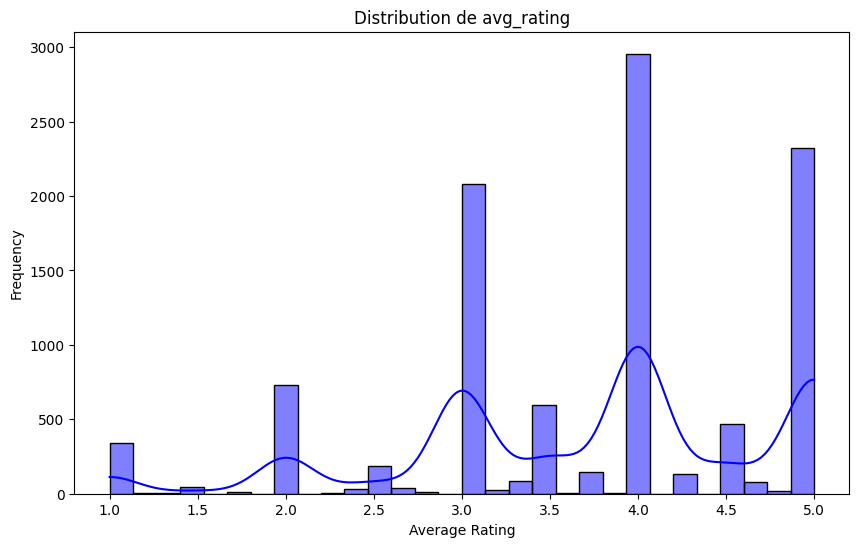

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(df['avg_rating'], bins=30, kde=True, color='blue', edgecolor='black')

plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution de avg_rating')

plt.show()

In [4]:
# Charger le tokenizer de GPT-3.5 ou GPT-4
tokenizer = tiktoken.encoding_for_model("gpt-3.5-turbo")

# Texte à tokenizer
text = "Bonjour, ceci est un test de BPE."

# Tokenisation
tokens = tokenizer.encode(text)

# Décodage
decoded_text = tokenizer.decode(tokens)

# Affichage
print("Token IDs :", tokens)
print("Texte reconstruit :", decoded_text)

Token IDs : [82681, 11, 272, 76832, 1826, 653, 1296, 409, 426, 1777, 13]
Texte reconstruit : Bonjour, ceci est un test de BPE.


In [ ]:
def create_list_prompt(df, tokenizer, max_length=512):
    # Création d'une liste de prompts
    prompts = []

    for i, row in df.iterrows():
        # Texte à tokeniser
        text = row['prompt']

        # Tokenisation
        tokens = np.array(tokenizer.encode(text))

        # size de res = max_length
        res = np.zeros(max_length)
        if (len(tokens) > max_length):
            res = tokens[:max_length]
        else:
            res[:len(tokens)] = tokens
        prompts.append(res)
    return np.array(prompts)

def preprocess(data) :
    # Normalisation
    data = (data - data.mean()) / data.std()
    return data


In [17]:
data = create_list_prompt(df, tokenizer)
data = preprocess(data)
data

array([[ 7.94854819,  0.21291453,  1.74362472, ..., -0.19670468,
        -0.19670468, -0.19670468],
       [ 0.88149146, -0.16175334,  0.39151062, ..., -0.19670468,
        -0.19670468, -0.19670468],
       [-0.11144458, -0.14110027,  0.26600351, ..., -0.19670468,
        -0.19670468, -0.19670468],
       ...,
       [ 0.71070646, -0.13064134,  0.26573872, ..., -0.19670468,
        -0.19670468, -0.19670468],
       [ 5.24710022, -0.07463975, -0.07702279, ..., -0.19670468,
        -0.19670468, -0.19670468],
       [-0.19140903, -0.01268054, -0.15553094, ..., -0.19670468,
        -0.19670468, -0.19670468]])

In [19]:
from sentence_transformers import SentenceTransformer

# Charger le modèle d'embedding pré-entraîné
model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

# Liste de phrases à transformer en embeddings
phrases = [
    "Bonjour, comment ça va ?",
    "Quelles sont les dernières nouvelles ?",
    "J'adore la programmation Python !"
]

# Générer les embeddings
embeddings = model.encode(phrases)

# Afficher les embeddings
for i, emb in enumerate(embeddings):
    print(f"Embedding pour la phrase {i+1}: {emb[:10]}...")  # Affiche seulement les 10 premiers éléments pour une meilleure lisibilité


2025-03-10 16:44:11.606884: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-10 16:44:12.461295: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Embedding pour la phrase 1: [-0.6031364   0.20574622 -0.3126051  -0.8570059  -0.35565704  0.22836527
  0.47292084  0.4965473  -0.09161367 -0.6516844 ]...
Embedding pour la phrase 2: [-0.9619866   0.04271807 -0.4557252   0.5064846  -0.21903755 -0.36973917
  0.29768074 -0.6740221   0.37940818 -0.35378072]...
Embedding pour la phrase 3: [-0.5554267   0.48953974  0.45471153 -0.5688725  -0.711079    0.11883981
  0.60016286  0.6047941  -1.1346858   0.27206853]...


In [20]:
# Liste de phrases à transformer en embeddings
phrases = [
    "Bonjour, comment ça va ?",
    "Quelles sont les dernières nouvelles ?",
    "J'adore la programmation Python !"
]

# Générer les embeddings
embeddings = model.encode(phrases)

# Afficher les embeddings
for i, emb in enumerate(embeddings):
    print(f"Embedding pour la phrase {i+1}: {emb[:10]}...")  # Affiche seulement les 10 premiers éléments pour une meilleure lisibilité

Embedding pour la phrase 1: [-0.6031364   0.20574622 -0.3126051  -0.8570059  -0.35565704  0.22836527
  0.47292084  0.4965473  -0.09161367 -0.6516844 ]...
Embedding pour la phrase 2: [-0.9619866   0.04271807 -0.4557252   0.5064846  -0.21903755 -0.36973917
  0.29768074 -0.6740221   0.37940818 -0.35378072]...
Embedding pour la phrase 3: [-0.5554267   0.48953974  0.45471153 -0.5688725  -0.711079    0.11883981
  0.60016286  0.6047941  -1.1346858   0.27206853]...
